In [1]:
%load_ext sppl.magics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%sppl model
from sppl.sym_util import binspace
X ~= truncnorm(a=-4, b=4)
switch (X) cases (x in binspace(-4, 4, 9)):
    Y ~= poisson(mu=1+2*abs((x.left+x.right)/2)**3)

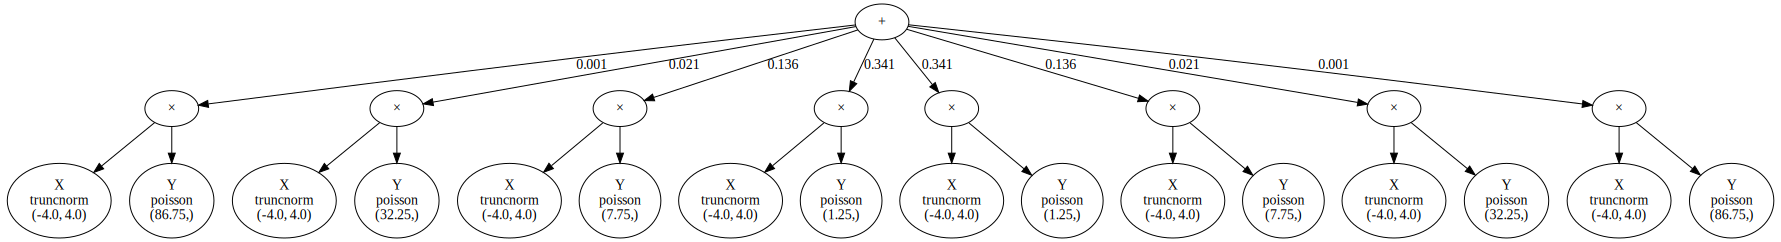

In [3]:
%sppl_to_graph model

In [4]:
n = %sppl_get_namespace model

<BarContainer object of 20 artists>

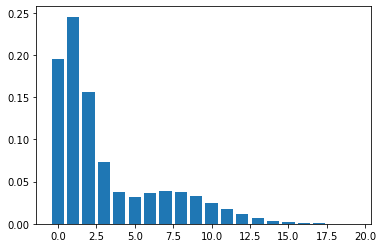

In [5]:
xs = np.arange(0, 20)
plt.bar(xs, [n.model.pdf({n.Y: x}) for x in xs])

In [6]:
xs = np.linspace(-4,4,100)
ys = np.arange(0, 70)
pdfx_prior = [n.model.pdf({n.X: x}) for x in xs]
pdfy_prior = [n.model.pdf({n.Y: y}) for y in ys]

In [7]:
models_post = [None]*3
models_post[0] = n.model.condition(n.Y << {4,5})
models_post[1] = n.model.condition(n.Y << {18})
models_post[2] = n.model.condition(45 <= n.Y)
pdfx_post = [[m.pdf({n.X: x}) for x in xs] for m in models_post]

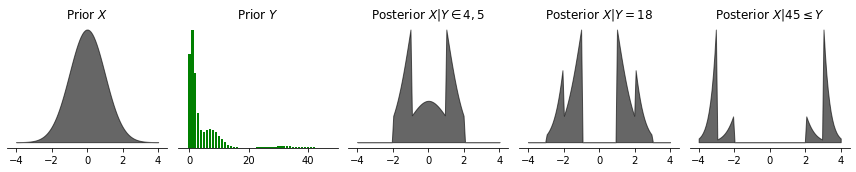

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5)

for ax, p in zip(np.concatenate((axes[:1], axes[2:])), [pdfx_prior] + pdfx_post):
    ax.fill_between(xs, p, alpha=0.6, color='k')
    ax.set_xlim([-4.5, 4.5])

axes[1].bar(ys, pdfy_prior, color='g')
axes[1].set_xlim([None, 50])

for ax in axes:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
axes[0].set_title('Prior $X$')
axes[1].set_title('Prior $Y$')
axes[2].set_title(r'Posterior $X | Y \in {4,5}$')
axes[3].set_title(r'Posterior $X | Y = 18$')
axes[4].set_title(r'Posterior $X | 45 \leq Y$')

fig.set_size_inches(12, 2.5)
fig.set_tight_layout(True)